In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# pip install deepface

In [4]:
# Import deepface library
from deepface import DeepFace

In [5]:
img = cv2.imread('testdata//happygirl.png')
img2 = cv2.imread('testdata/sadman.jpg')
img3 = cv2.imread('testdata/angryman.jpg')

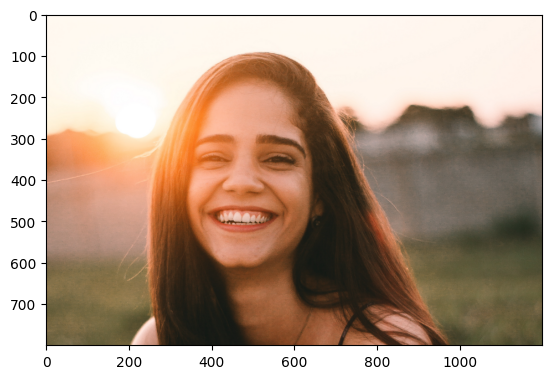

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
predictions = DeepFace.analyze(img, actions = ['emotion'], prog_bar=False)

1/1 [==============================] - 0s 26ms/step


In [21]:
??DeepFace.analyze

Signature:
DeepFace.analyze(
    img_path,
    actions=('emotion', 'age', 'gender', 'race'),
    models=None,
    enforce_detection=True,
    detector_backend='opencv',
    prog_bar=True,
)
Source:   
def analyze(img_path, actions = ('emotion', 'age', 'gender', 'race') , models = None, enforce_detection = True, detector_backend = 'opencv', prog_bar = True):

        """
        This function analyzes facial attributes including age, gender, emotion and race

        Parameters:
                img_path: exact image path, numpy array (BGR) or base64 encoded image could be passed. If you are going to analyze lots of images, then set this to list. e.g. img_path = ['img1.jpg', 'img2.jpg']

                actions (tuple): The default is ('age', 'gender', 'emotion', 'race'). You can drop some of those attributes.

                models: (Optional[dict]) facial attribute analysis models are built in every call of analyze function. You can pass pre-built models to speed the function up.

   

<h2> Making Predictions using deep face library

In [8]:
# This is a dictionary
predictions

{'emotion': {'angry': 8.0860132811722e-05,
  'disgust': 2.614397054401252e-06,
  'fear': 0.001330917984887492,
  'happy': 99.44735169410706,
  'sad': 0.269459025003016,
  'surprise': 4.885425255451992e-05,
  'neutral': 0.28173320461064577},
 'dominant_emotion': 'happy',
 'region': {'x': 286, 'y': 186, 'w': 404, 'h': 404}}

In [9]:
predictions['dominant_emotion']

'happy'

In [10]:
# To identify faces and to draw a rectangle
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [11]:
def analyzeEmotion(img):
    predictions = DeepFace.analyze(img, actions = ['emotion'], prog_bar=False)
    print(predictions)
    
    return predictions

In [32]:
def visualizeEmotion(img,predictions):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.array(gray, dtype='uint8')
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw rectangle
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
        
    # putText method to include text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,
               predictions['dominant_emotion'],
               (10,100),
               font,
                1,
               (0,0,255),
               5);

In [29]:
happyPred = analyzeEmotion(img)

1/1 [==============================] - 0s 26ms/step
{'emotion': {'angry': 1.1301171517182936e-05, 'disgust': 2.6652368013566756e-08, 'fear': 0.0006074529572379443, 'happy': 99.93335008223951, 'sad': 0.018265921605302937, 'surprise': 8.195622802630474e-06, 'neutral': 0.04775582922750438}, 'dominant_emotion': 'happy', 'region': {'x': 286, 'y': 186, 'w': 405, 'h': 405}}


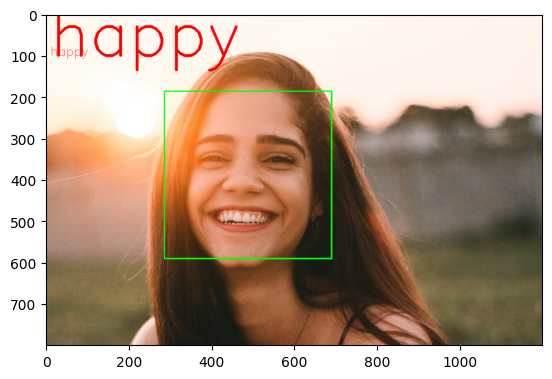

In [30]:
visualizeEmotion(img, happyPred)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
sadPred = analyzeEmotion(img2)

1/1 [==============================] - 0s 31ms/step
{'emotion': {'angry': 0.4621022380888462, 'disgust': 5.2536853445417364e-05, 'fear': 0.2710433676838875, 'happy': 0.05675149732269347, 'sad': 4.288219287991524, 'surprise': 1.4244075430269731e-05, 'neutral': 94.92181539535522}, 'dominant_emotion': 'neutral', 'region': {'x': 297, 'y': 196, 'w': 346, 'h': 346}}


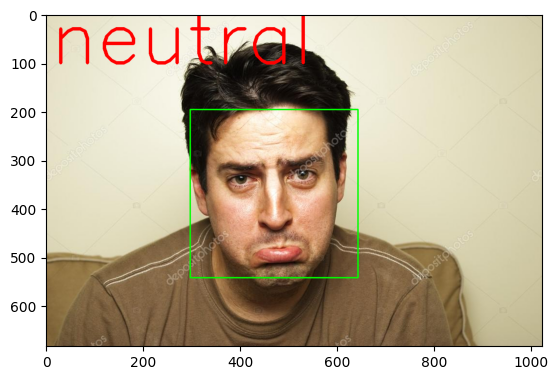

In [16]:
visualizeEmotion(img2,sadPred)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

<h2> Real time Video for Face Emotion Recognition <h2>

In [34]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if webcam opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    visualizeEmotion(frame, result)
    
    cv2.imshow('Original video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.